# Importing Libraries

In [ ]:
#importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.collections as clt
import math
import datetime

In [ ]:
from sklearn import preprocessing

In [ ]:
#installing the ptitprince so we can use Rain Cloud to understand our data better
!pip install ptitprince
import ptitprince as pt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#reading the CSV by using the path (we worked on Google Colab because it was easier for us as a team to work in the same notebook)
path = "/content/drive/MyDrive/DS Project/Invoice_dataset.csv"
data = pd.read_csv(path)

#Data frame for finding the wrong dates
df3 =  pd.read_csv(path)

In [ ]:
data

,UniqueId,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay
0,5133177585,North America,06/11/2011,03/01/2012,06/02/2012,55.37,No,Paper,True
1,280670965,South America,17/11/2011,03/01/2012,15/02/2012,50.39,No,Paper,False
2,6393629835,Europe,28/11/2011,03/01/2012,15/02/2012,71.33,No,Paper,False
3,5928070131,Africa&Asia,01/11/2011,03/01/2012,22/01/2012,97.60,No,Paper,True
4,6050714721,Africa&Asia,08/11/2011,03/01/2012,15/02/2012,15.99,Yes,Paper,True
...,...,...,...,...,...,...,...,...,...
1845,3924052139,Europe,22/03/2013,05/06/2013,29/06/2013,103.11,Yes,Electronic,True
1846,1858692476,Central America,04/04/2013,05/06/2013,22/06/2013,43.07,Yes,Electronic,True
1847,951035745,North America,25/05/2013,05/06/2013,18/07/2013,57.04,No,Electronic,False
1848,9018028314,North America,13/04/2013,05/06/2013,18/07/2013,57.33,No,Electronic,False


# General Info about the DataSet

In [ ]:
data

,UniqueId,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay
0,5133177585,North America,06/11/2011,03/01/2012,06/02/2012,55.37,No,Paper,True
1,280670965,South America,17/11/2011,03/01/2012,15/02/2012,50.39,No,Paper,False
2,6393629835,Europe,28/11/2011,03/01/2012,15/02/2012,71.33,No,Paper,False
3,5928070131,Africa&Asia,01/11/2011,03/01/2012,22/01/2012,97.60,No,Paper,True
4,6050714721,Africa&Asia,08/11/2011,03/01/2012,15/02/2012,15.99,Yes,Paper,True
...,...,...,...,...,...,...,...,...,...
1845,3924052139,Europe,22/03/2013,05/06/2013,29/06/2013,103.11,Yes,Electronic,True
1846,1858692476,Central America,04/04/2013,05/06/2013,22/06/2013,43.07,Yes,Electronic,True
1847,951035745,North America,25/05/2013,05/06/2013,18/07/2013,57.04,No,Electronic,False
1848,9018028314,North America,13/04/2013,05/06/2013,18/07/2013,57.33,No,Electronic,False


In [ ]:
#Since we don't know the Data characteristics we use .info() to get a general view of our data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UniqueId     1850 non-null   int64  
 1   Region       1823 non-null   object 
 2   OrderDate    1850 non-null   object 
 3   InvoiceDate  1850 non-null   object 
 4   DueDate      1850 non-null   object 
 5   Amount       1842 non-null   float64
 6   Disputed     1823 non-null   object 
 7   InvoiceType  1842 non-null   object 
 8   Delay        1850 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 117.6+ KB


In [ ]:
#Droping the Column UniqieId since it is not important in our Case and dosn't play a role in what we are going to do
data.drop('UniqueId', axis=1, inplace=True)

In [ ]:
#Checking the data after the drop
data

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay
0,North America,06/11/2011,03/01/2012,06/02/2012,55.37,No,Paper,True
1,South America,17/11/2011,03/01/2012,15/02/2012,50.39,No,Paper,False
2,Europe,28/11/2011,03/01/2012,15/02/2012,71.33,No,Paper,False
3,Africa&Asia,01/11/2011,03/01/2012,22/01/2012,97.60,No,Paper,True
4,Africa&Asia,08/11/2011,03/01/2012,15/02/2012,15.99,Yes,Paper,True
...,...,...,...,...,...,...,...,...
1845,Europe,22/03/2013,05/06/2013,29/06/2013,103.11,Yes,Electronic,True
1846,Central America,04/04/2013,05/06/2013,22/06/2013,43.07,Yes,Electronic,True
1847,North America,25/05/2013,05/06/2013,18/07/2013,57.04,No,Electronic,False
1848,North America,13/04/2013,05/06/2013,18/07/2013,57.33,No,Electronic,False


In [ ]:
#Finding Columns that have missing Data
miss_col = [var for var in data.columns if data[var].isnull().mean()>0]
print(miss_col)

['Region', 'Amount', 'Disputed', 'InvoiceType']


In [ ]:
#Calculating how much of Data is missing for each Column in percent.
print((data['Region'].isnull().mean())*100)
print((data['Amount'].isnull().mean())*100)
print((data['Disputed'].isnull().mean())*100)
print((data['InvoiceType'].isnull().mean())*100)

1.4594594594594594
0.43243243243243246
1.4594594594594594
0.43243243243243246


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ef7ee1430>]],
      dtype=object)

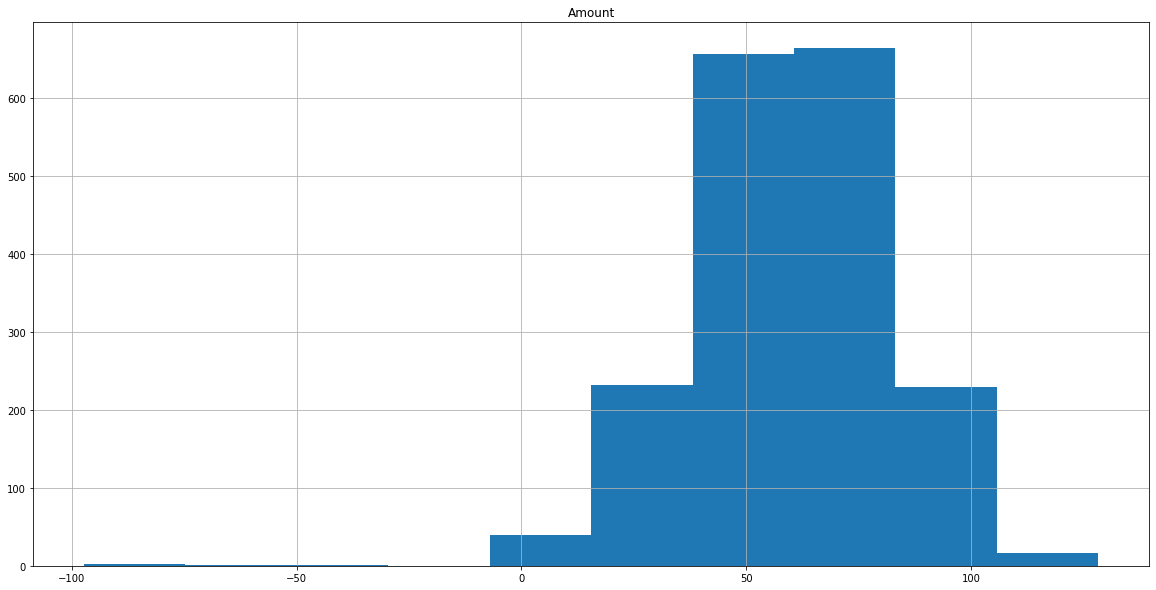

In [ ]:
#Using the Histrogram Vizualization to understand the distribution of the Amount Variable(column)
data.hist()

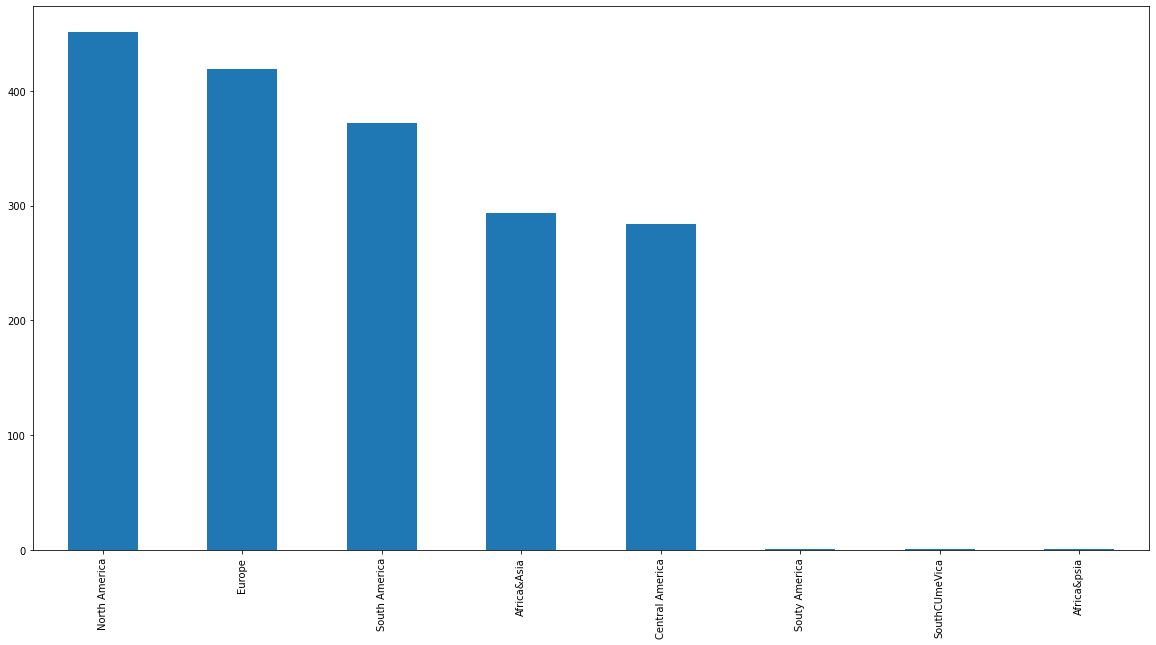

In [ ]:
#Using Vizualization to understand better value count of Region (it's frequence of values)
data['Region'].value_counts().plot.bar()

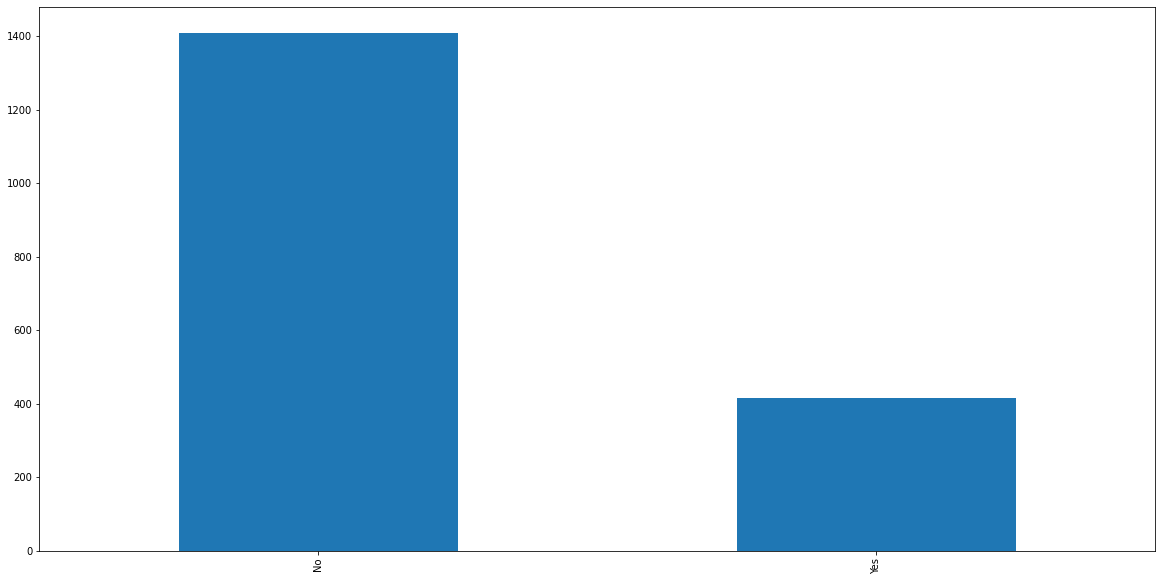

In [ ]:
#Using Vizualization to understand better value count of Disputed
data['Disputed'].value_counts().plot.bar()

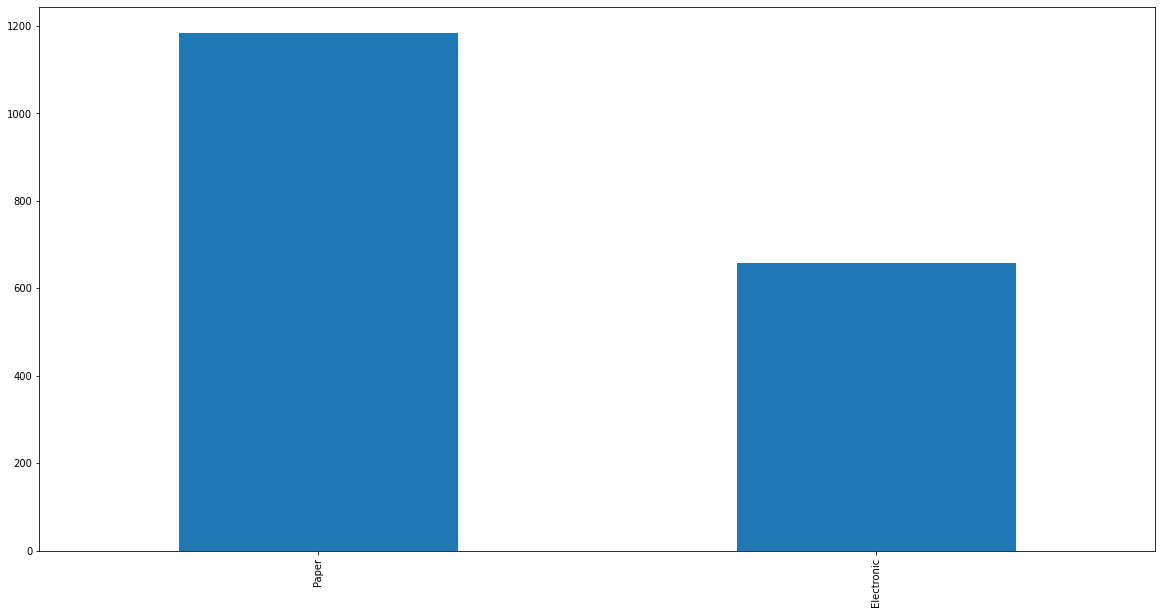

In [ ]:
#Using Vizualization to understand better value count of Invoice Type
data['InvoiceType'].value_counts().plot.bar()

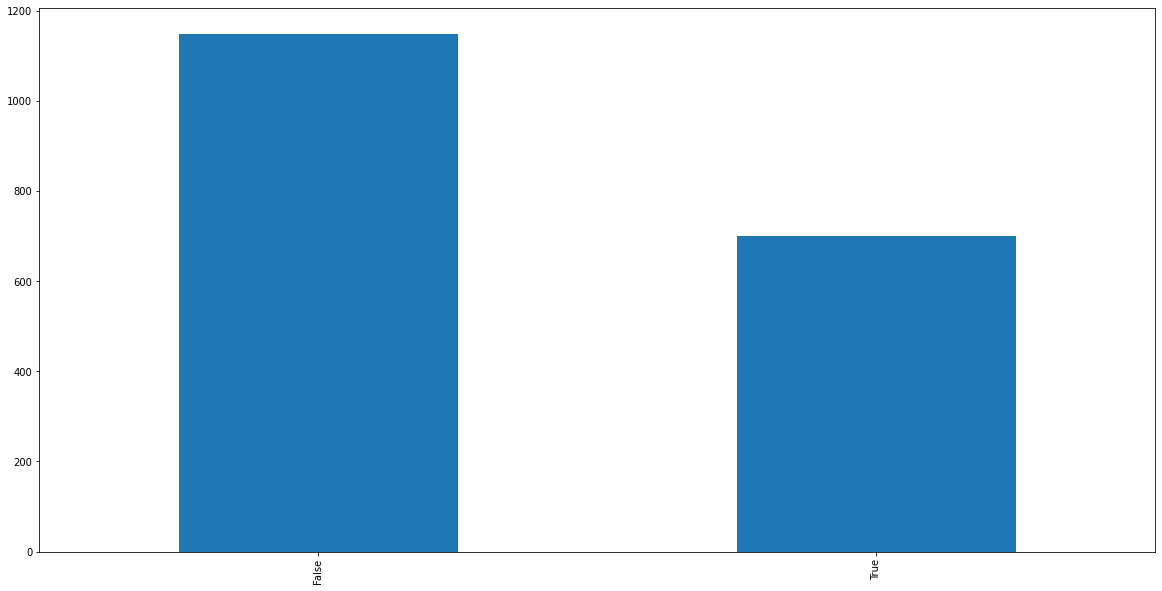

In [ ]:
##Using Vizualization to understand better value count of Delay
data['Delay'].value_counts().plot.bar()

# **FEATURE ENGINEERING**

# Date Clearing

In [ ]:
data.head()

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay
0,North America,06/11/2011,03/01/2012,06/02/2012,55.37,No,Paper,True
1,South America,17/11/2011,03/01/2012,15/02/2012,50.39,No,Paper,False
2,Europe,28/11/2011,03/01/2012,15/02/2012,71.33,No,Paper,False
3,Africa&Asia,01/11/2011,03/01/2012,22/01/2012,97.60,No,Paper,True
4,Africa&Asia,08/11/2011,03/01/2012,15/02/2012,15.99,Yes,Paper,True


In [ ]:
#transformig the second df to time value so i can find the wrong values of date
df3['OrderDate'] = pd.to_datetime(df3['OrderDate'],'coerce')
df3['InvoiceDate'] = pd.to_datetime(df3['InvoiceDate'],'coerce')
df3['DueDate'] = pd.to_datetime(df3['DueDate'],'coerce')

In [ ]:
#finding the null values of dates after transforming
df3[df3['OrderDate'].isna() == True]
df3[df3['InvoiceDate'].isna() == True]
df3[df3['DueDate'].isna() == True]

,UniqueId,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay
227,3636727153,North America,2012-02-17,2012-12-03,NaT,67.83,Yes,Paper,True
482,7683330179,North America,2012-04-13,2012-05-23,NaT,50.44,No,Paper,True
794,9566049241,Africa&Asia,2012-11-08,2012-08-25,NaT,36.09,No,Paper,False
1317,5018112852,Central America,2012-11-18,2013-09-01,NaT,52.90,No,Paper,False
1563,9506308848,South America,2013-07-02,2013-03-24,NaT,33.37,No,Electronic,False
1705,8164212163,Africa&Asia,2013-03-18,2013-04-30,NaT,27.41,Yes,Electronic,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       1823 non-null   object 
 1   OrderDate    1850 non-null   object 
 2   InvoiceDate  1850 non-null   object 
 3   DueDate      1850 non-null   object 
 4   Amount       1842 non-null   float64
 5   Disputed     1823 non-null   object 
 6   InvoiceType  1842 non-null   object 
 7   Delay        1850 non-null   bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 103.1+ KB


In [ ]:
#visualizing the wrong dates
data.iloc[[26,129,908,1017,1338,1376]]
data.iloc[[474,635,776,1006,1089,1189,1286,1683]]
data.iloc[[227,482,794,1317,1563,1705]]

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay
227,North America,17/02/2012,12/03/2012,1112-04-14,67.83,Yes,Paper,True
482,North America,13/04/2012,23/05/2012,3012-06-44,50.44,No,Paper,True
794,Africa&Asia,11/08/2012,25/08/2012,1012-10-70,36.09,No,Paper,False
1317,Central America,18/11/2012,09/01/2013,1013-02-21,52.90,No,Paper,False
1563,South America,07/02/2013,24/03/2013,3013-50-06,33.37,No,Electronic,False
1705,Africa&Asia,18/03/2013,30/04/2013,09/06/3013,27.41,Yes,Electronic,True


In [ ]:
#replacing the wrong dates in first dataframe
data=data.replace({'1011-12-10':'10/12/2011','09/12/2311':'09/12/2011','25/07/3012':'25/07/2012','1012-09-20':'20/09/2012','1012-12-01':'01/12/2012','02/12/3012':'02/12/2012'})
data=data.replace({'1012-05-22':'22/05/2012','06/07/3012':'06/07/2012','1012-10-21':'21/10/2012','2025-21-11':'21/11/2012','08/12/3012':'08/12/2012','2413-01-92':'29/01/2013','1013-40-24':'24/04/2013'})
data=data.replace({'1112-04-14':'14/04/2012','1012-10-70':'07/10/2012','1013-02-21':'21/02/2013','3013-50-06':'06/05/2013','09/06/3013':'09/06/2013'})

In [ ]:
#droping the dates that i couldn't fill
data.drop([776,482], axis=0, inplace=True)

In [ ]:
#transforming the dates from string to datetype in the first dataframe
data["InvoiceDate"] =  pd.to_datetime(data["InvoiceDate"], format="%d/%m/%Y")
data["DueDate"] =  pd.to_datetime(data["DueDate"], format="%d/%m/%Y")
data["OrderDate"] =  pd.to_datetime(data["OrderDate"], format="%d/%m/%Y")

In [ ]:
# Filtering Dates outside 2011 and 2013
data = data.loc[(data['InvoiceDate'] >= '2011-01-01') & (data['InvoiceDate'] < '2014-01-01')]

In [ ]:
#making new columns with the diffrence betwend date coolumns
data['InvoiceOrderDiff'] = ((data.InvoiceDate - data.OrderDate)/np.timedelta64(1, 'D'))
data['InvoiceOrderDiff'] = data['InvoiceOrderDiff'].astype(int)
data['DueInvoiceDiff'] = ((data.DueDate - data.InvoiceDate)/np.timedelta64(1, 'D'))
data['DueInvoiceDiff'] = data['DueInvoiceDiff'].astype(int)
data['DueOrderDiff'] = ((data.DueDate - data.OrderDate)/np.timedelta64(1, 'D'))
data['DueOrderDiff'] = data['DueOrderDiff'].astype(int)
data.head()

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff
0,North America,2011-11-06,2012-01-03,2012-02-06,55.37,No,Paper,True,58,34,92
1,South America,2011-11-17,2012-01-03,2012-02-15,50.39,No,Paper,False,47,43,90
2,Europe,2011-11-28,2012-01-03,2012-02-15,71.33,No,Paper,False,36,43,79
3,Africa&Asia,2011-11-01,2012-01-03,2012-01-22,97.60,No,Paper,True,63,19,82
4,Africa&Asia,2011-11-08,2012-01-03,2012-02-15,15.99,Yes,Paper,True,56,43,99


In [ ]:
#making new columns with the day/month/year of the 3 date columns
data['OrderDay'] = data['OrderDate'].apply(lambda time: time.day)
data['OrderMonth'] = data['OrderDate'].apply(lambda time: time.month)
data['OrderYear'] = data['OrderDate'].apply(lambda time: time.year)
data['InvoiceDay'] = data['InvoiceDate'].apply(lambda time: time.day)
data['InvoiceMonth'] = data['InvoiceDate'].apply(lambda time: time.month)
data['InvoiceYear'] = data['InvoiceDate'].apply(lambda time: time.year)
data['DueDay'] = data['DueDate'].apply(lambda time: time.day)
data['DueMonth'] = data['DueDate'].apply(lambda time: time.month)
data['DueYear'] = data['DueDate'].apply(lambda time: time.year)
data.head()

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,OrderDay,OrderMonth,OrderYear,InvoiceDay,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear
0,North America,2011-11-06,2012-01-03,2012-02-06,55.37,No,Paper,True,58,34,92,6,11,2011,3,1,2012,6,2,2012
1,South America,2011-11-17,2012-01-03,2012-02-15,50.39,No,Paper,False,47,43,90,17,11,2011,3,1,2012,15,2,2012
2,Europe,2011-11-28,2012-01-03,2012-02-15,71.33,No,Paper,False,36,43,79,28,11,2011,3,1,2012,15,2,2012
3,Africa&Asia,2011-11-01,2012-01-03,2012-01-22,97.60,No,Paper,True,63,19,82,1,11,2011,3,1,2012,22,1,2012
4,Africa&Asia,2011-11-08,2012-01-03,2012-02-15,15.99,Yes,Paper,True,56,43,99,8,11,2011,3,1,2012,15,2,2012


# Amount Cleaning

In [ ]:
#Describing the Numerical Column (Amount) so we can understand it's characteristics
data['Amount'].describe()

count    1837.000000
mean       59.573081
std        21.397330
min       -97.330000
25%        46.310000
50%        60.350000
75%        73.750000
max       128.280000
Name: Amount, dtype: float64

matplotlib.axes._subplots.AxesSubplot

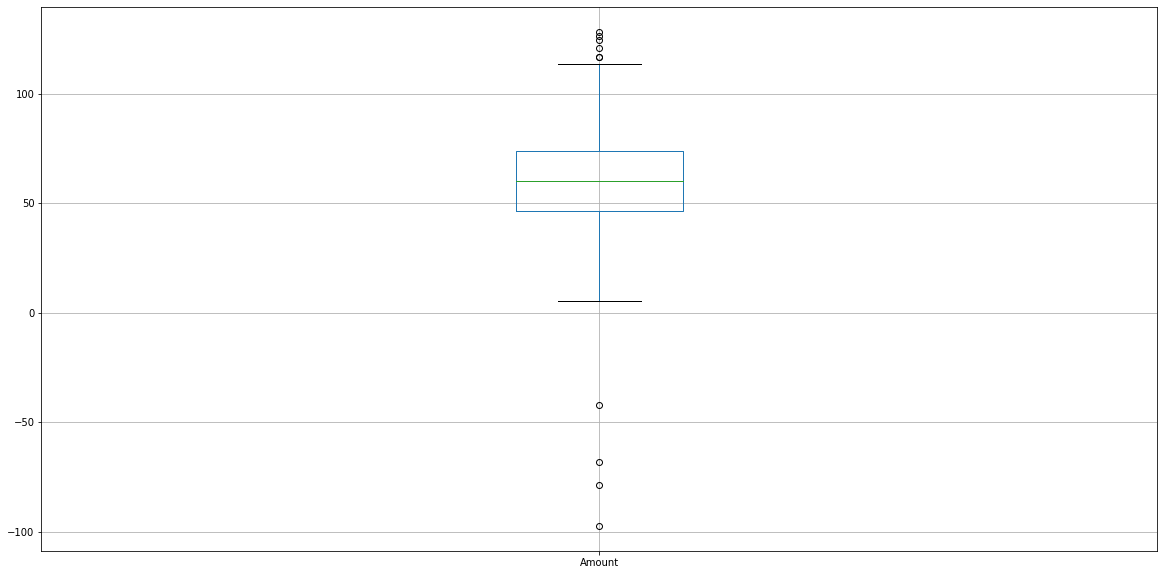

In [ ]:
#Simple BoxPlot Vizualization so we can see if Amount has Outlier(External Values)
boxplot = data.boxplot(column=['Amount'], return_type='axes')
type(boxplot)

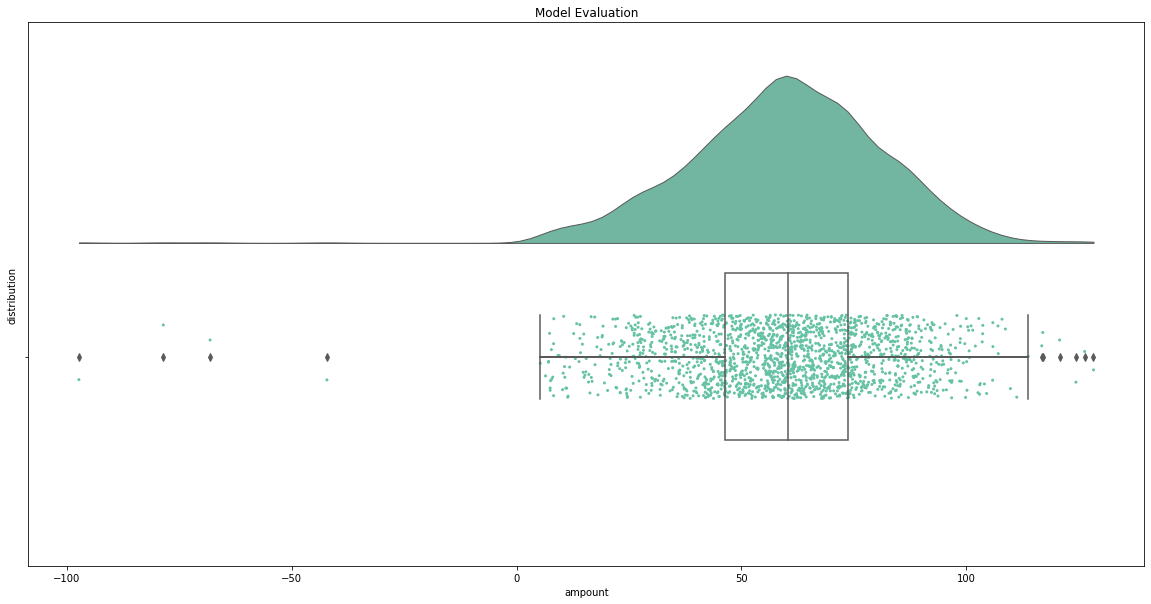

In [ ]:
#Using Viz. RainCloud so we can understand the Distribution of Amount(it's mean and where do most of values fall) and where do the Outliers fall before Handeling the them.
plt.figure(figsize=(20,10))
ax = pt.RainCloud(y = 'Amount',
                  data = data,
                  width_viol = 0.8,
                  width_box = 0.4,
                  orient = 'h',
                  move = 0)
plt.title('Model Evaluation')
plt.xlabel('ampount')
plt.ylabel('distribution')
plt.show()

In [ ]:
# filtering data, so taking the Amount without NaN values so we can Handle(Droping) the Outliers (since there are low numbers of Rows)
# displaying data only with Amount = NaN
bool_series = pd.isnull(data["Amount"])
data[bool_series]

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,OrderDay,OrderMonth,OrderYear,InvoiceDay,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear
136,South America,2012-01-06,2012-02-14,2012-03-25,NaN,No,Paper,True,39,40,79,6,1,2012,14,2,2012,25,3,2012
368,Africa&Asia,2012-02-07,2012-04-19,2012-06-01,NaN,Yes,Paper,False,72,43,115,7,2,2012,19,4,2012,1,6,2012
456,North America,2012-04-27,2012-05-19,2012-07-01,NaN,No,Electronic,False,22,43,65,27,4,2012,19,5,2012,1,7,2012
916,South America,2012-07-28,2012-09-25,2012-11-07,NaN,No,Electronic,False,59,43,102,28,7,2012,25,9,2012,7,11,2012
951,North America,2012-07-27,2012-10-02,2012-11-14,NaN,No,Paper,False,67,43,110,27,7,2012,2,10,2012,14,11,2012
1447,North America,2012-12-29,2013-02-16,2013-03-31,NaN,No,Electronic,False,49,43,92,29,12,2012,16,2,2013,31,3,2013
1679,Europe,2013-02-23,2013-04-24,2013-06-06,NaN,No,Electronic,False,60,43,103,23,2,2013,24,4,2013,6,6,2013
1796,North America,2013-04-19,2013-05-25,2013-07-07,NaN,No,Paper,False,36,43,79,19,4,2013,25,5,2013,7,7,2013


In [ ]:
#droping NaN values and saving the rows with no null values in a data frame
missingval_Amount = data.dropna(subset=['Amount'])

In [ ]:
#checking if this new dataframe has NaN values
doseithavemissingvalues = pd.isnull(missingval_Amount['Amount'])
missingval_Amount[doseithavemissingvalues]

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,OrderDay,OrderMonth,OrderYear,InvoiceDay,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear


In [ ]:
#getting from this dataframe only the values of Amount as an Array
arrayofAmount = missingval_Amount.to_numpy()

#Creating an empty List and appending the values of Amount without the NaN values
arrayAmount = []

for i in arrayofAmount:
      x = np.take(i,indices = 4)
      arrayAmount.append(x)
print(arrayAmount)

[55.37, 50.39, 71.33, 97.6, 15.99, 67.71, 75.21, 55.91, 78.29, 32.28, 78.05, 70.34, 47.07, 46.33, 78.92, 63.92, 28.84, 83.12, 40.22, 100.32, 56.86, 41.99, 71.66, 47.75, 7.45, 84.42, 73.06, 64.19, 80.99, 87.89, 72.72, 78.49, 54.44, 65.9, 47.48, 45.41, 48.64, 46.28, 48.06, 57.55, 78.37, 74.01, 62.84, 49.25, 87.78, 69.99, 67.15, 18.03, 56.55, 77.44, 43.77, 60.52, 78.09, 56.51, 70.91, 81.9, 32.78, 92.19, 72.06, 72.49, 87.1, 78.33, 49.62, 80.71, 72.7, 66.92, 22.09, 7.55, 98.51, 47.02, 53.73, 94.0, 53.81, 58.71, 86.92, 64.89, 60.17, 74.25, 51.13, 96.02, 27.63, 49.83, 59.08, 59.34, 85.22, 72.1, 56.37, 81.13, 69.55, 73.32, 80.31, 87.13, 56.2, 84.13, 20.47, 73.82, 44.92, 70.47, 83.15, 68.48, 75.04, 69.78, 43.29, 63.28, 54.6, 71.46, 44.52, 113.76, 75.19, 72.49, 88.89, 86.44, 30.74, 48.47, 68.28, 6.43, 53.33, 64.54, 45.0, 64.87, 43.62, 68.08, 27.22, 65.67, 39.67, 69.43, 28.21, 55.42, 70.45, 24.25, 86.74, 40.16, 68.28, 83.42, 76.47, 83.09, 30.05, 46.66, 56.36, 64.02, 79.21, 28.22, 47.45, 72.79, 57

In [ ]:
#Removing Outliers
listt1 = []
for i in arrayAmount:
  if  i > 115:
    listt1.append(i)
  if i < 6:
    listt1.append(i)
print(listt1)

[117.01, 120.76, 116.78, 128.28, -42.18, 124.38, -68.17, 5.26, -97.33, 126.31, -78.57]


In [ ]:
#Droping the Values by using the list
for i in listt1:
  data = data.drop((data.index[data['Amount']==i].tolist()))

matplotlib.axes._subplots.AxesSubplot

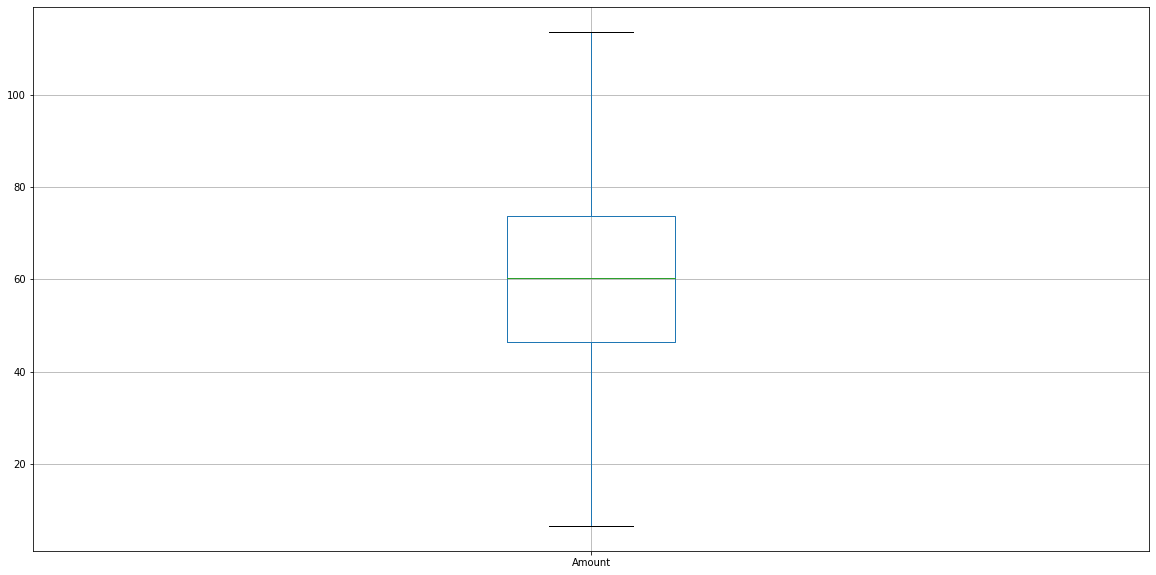

In [ ]:
boxplot = data.boxplot(column=['Amount'], return_type='axes')
type(boxplot)

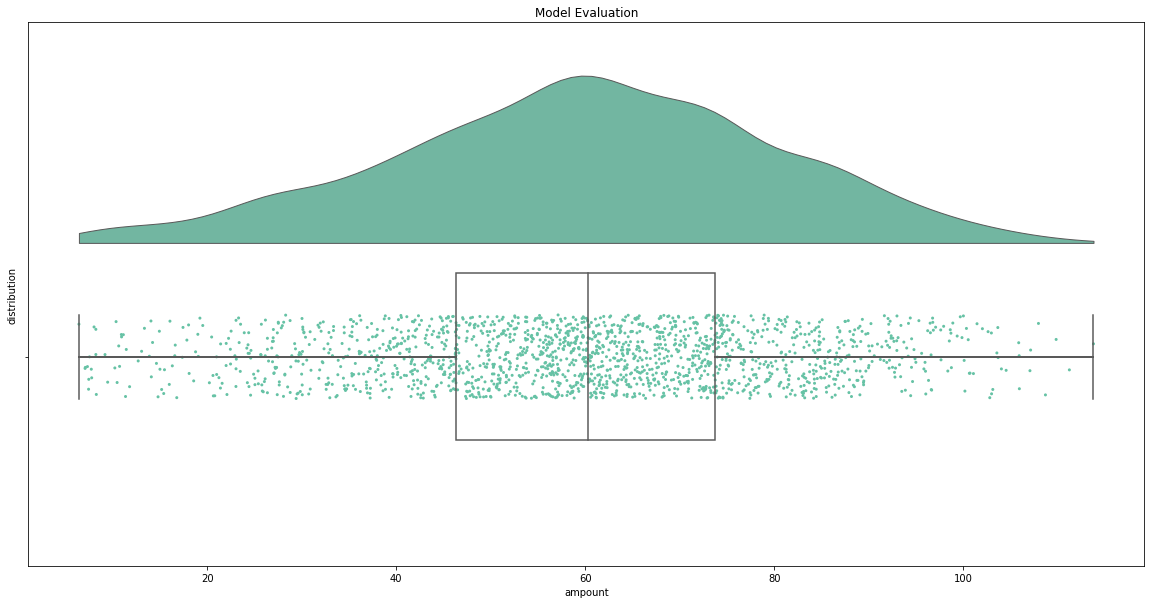

In [ ]:
#RainCloud after Handeling the Outliers of Amount
data
plt.figure(figsize=(20,10))
ax = pt.RainCloud(y = 'Amount',
                  data = data,
                  width_viol = 0.8,
                  width_box = 0.4,
                  orient = 'h',
                  move = 0)
plt.title('Model Evaluation')
plt.xlabel('ampount')
plt.ylabel('distribution')
plt.show()

# Region Cleaning

In [ ]:
##Handeling Region Missing Values and Typing Problems (through AVG of Amount of each Region we can fill the Missing values of Amount)

#Vizualizing Region
data['Region'].value_counts()

North America      447
Europe             413
South America      369
Africa&Asia        292
Central America    283
Souty America        1
SouthCUmeVica        1
Africa&psia          1
Name: Region, dtype: int64

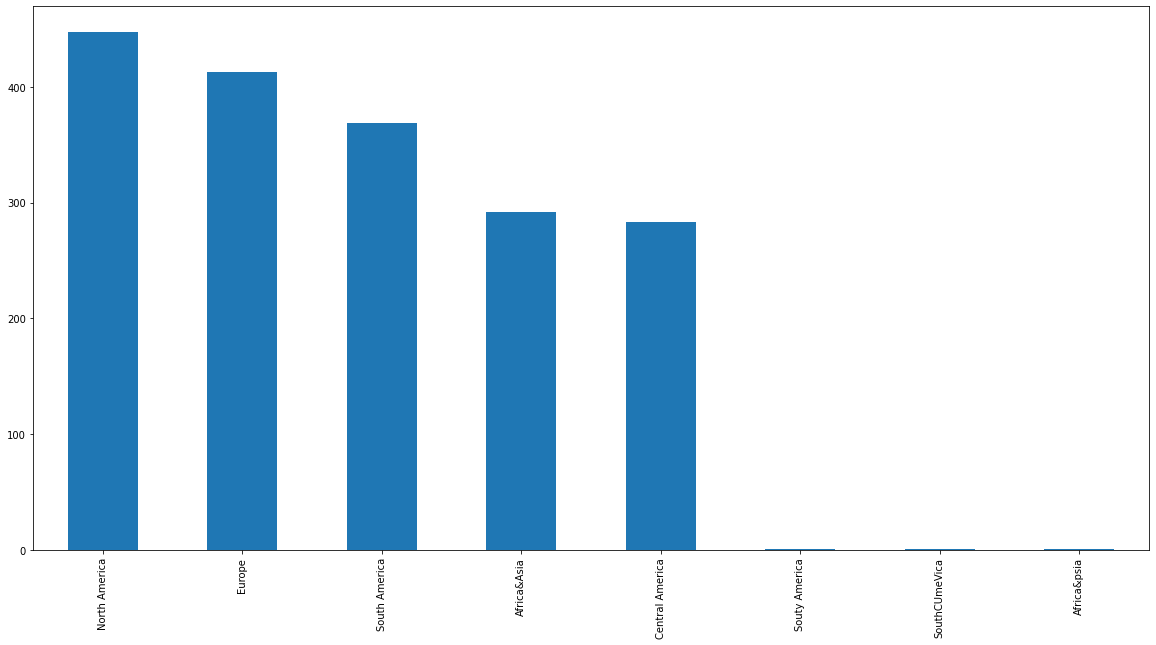

In [ ]:
data['Region'].value_counts().plot.bar()

In [ ]:
# Cleaning the data of typing Errors (handeling tping errors)
data['Region'].replace(['Souty America','SouthCUmeVica','Africa&psia'],['South America','South America','Africa&Asia'], inplace=True)

In [ ]:
# filtering data, so taking the Region without NaN values so we can Handle Missing Values
bool_series = pd.isnull(data["Region"])
data[bool_series]

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,OrderDay,OrderMonth,OrderYear,InvoiceDay,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear
36,NaN,2011-11-14,2012-01-15,2012-02-27,48.64,Yes,Paper,True,62,43,105,14,11,2011,15,1,2012,27,2,2012
65,NaN,2011-12-10,2012-01-25,2012-02-17,66.92,Yes,Paper,True,46,23,69,10,12,2011,25,1,2012,17,2,2012
112,NaN,2011-12-29,2012-02-08,2012-03-22,30.74,No,Paper,False,41,43,84,29,12,2011,8,2,2012,22,3,2012
146,NaN,2011-11-28,2012-02-16,2012-03-30,58.85,No,Paper,False,80,43,123,28,11,2011,16,2,2012,30,3,2012
211,NaN,2011-12-20,2012-03-08,2012-03-25,54.41,No,Paper,True,79,17,96,20,12,2011,8,3,2012,25,3,2012
271,NaN,2012-02-15,2012-03-23,2012-04-06,89.05,No,Paper,True,37,14,51,15,2,2012,23,3,2012,6,4,2012
294,NaN,2012-02-14,2012-03-29,2012-05-11,10.47,No,Paper,False,44,43,87,14,2,2012,29,3,2012,11,5,2012
340,NaN,2012-03-09,2012-04-11,2012-05-17,30.06,No,Electronic,True,33,36,69,9,3,2012,11,4,2012,17,5,2012
380,NaN,2012-03-14,2012-04-23,2012-06-05,73.87,No,Paper,False,40,43,83,14,3,2012,23,4,2012,5,6,2012
407,NaN,2012-03-15,2012-05-02,2012-06-14,73.30,No,Paper,False,48,43,91,15,3,2012,2,5,2012,14,6,2012


In [ ]:
# Length of missing Regions
len(data[bool_series])

27

In [ ]:
#Converting the DataFrame above into an array(dictionary) with only the values of Amount
arr = data[bool_series].to_numpy()
#print(arr)

#amarr = np.take(arr,indices = 4)
amarr = []

for i in arr:
      x = np.take(i,indices = 4)
      amarr.append(x)
print(amarr)
#print(len(data[bool_series]))

[48.64, 66.92, 30.74, 58.85, 54.41, 89.05, 10.47, 30.06, 73.87, 73.3, 60.46, 73.84, 45.73, 52.46, 59.56, 43.18, 10.36, 19.06, 36.71, 15.0, 57.05, 78.28, 83.02, 72.88, 90.08, 75.18, 56.09]


In [ ]:
#Taking only the rows with Region ---> North America
NA1 = data[data['Region'] == 'North America']

In [ ]:
NA1

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,OrderDay,OrderMonth,OrderYear,InvoiceDay,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear
0,North America,2011-11-06,2012-01-03,2012-02-06,55.37,No,Paper,True,58,34,92,6,11,2011,3,1,2012,6,2,2012
8,North America,2011-11-22,2012-01-05,2012-02-13,78.29,Yes,Paper,True,44,39,83,22,11,2011,5,1,2012,13,2,2012
10,North America,2011-11-23,2012-01-06,2012-02-18,78.05,No,Paper,False,44,43,87,23,11,2011,6,1,2012,18,2,2012
20,North America,2011-11-19,2012-01-09,2012-02-21,56.86,No,Paper,False,51,43,94,19,11,2011,9,1,2012,21,2,2012
21,North America,2011-11-14,2012-01-09,2012-02-21,41.99,No,Paper,False,56,43,99,14,11,2011,9,1,2012,21,2,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,North America,2013-05-04,2013-06-04,2013-07-14,68.40,No,Paper,True,31,40,71,4,5,2013,4,6,2013,14,7,2013
1844,North America,2013-05-04,2013-06-04,2013-07-17,68.97,No,Electronic,False,31,43,74,4,5,2013,4,6,2013,17,7,2013
1847,North America,2013-05-25,2013-06-05,2013-07-18,57.04,No,Electronic,False,11,43,54,25,5,2013,5,6,2013,18,7,2013
1848,North America,2013-04-13,2013-06-05,2013-07-18,57.33,No,Electronic,False,53,43,96,13,4,2013,5,6,2013,18,7,2013


In [ ]:
#droping from this Data Frame the Missing Values of Amount so we can Calculate the AVG of Region using Values of Amount (in North America)
NA1 = NA1.dropna(subset=['Amount'])
amountNA = NA1['Amount'].to_numpy()

In [ ]:
amountNA

array([ 55.37,  78.29,  78.05,  56.86,  41.99,  73.06,  72.72,  78.37,
        49.25,  69.99,  67.15,  77.44,  78.09,  81.9 ,  92.19,  80.71,
        72.7 ,  47.02,  53.73,  58.71,  74.25,  51.13,  56.37,  69.55,
        80.31,  56.2 ,  84.13,  83.15,  68.48,  71.46,  64.87,  68.08,
        39.67,  28.21,  70.45,  24.25,  86.74,  76.47,  79.21,  72.79,
        61.95,  51.07,  93.48,  62.85,  52.04,  83.21,  65.6 ,  92.11,
        55.09,  56.42,  48.75,  40.49,  48.65,  56.54,  53.79,  36.26,
        61.17,  59.3 ,  67.83,  38.45,  35.46,  84.25,  71.8 ,  81.87,
        85.82,  67.83,  76.21,  81.85,  95.82,  39.66,  46.25,  53.36,
        80.15,  48.2 ,  49.14, 103.64,  68.81,  42.61,  92.34,  92.76,
        53.69,  64.4 ,  60.32,  62.68,  58.57,  44.43, 100.7 ,  69.97,
        65.75,  84.31,  83.49,  74.28,  30.11,  54.82,  63.26,  77.6 ,
        58.73,  59.92,  72.62,  71.68,  73.9 ,  65.01,  96.6 ,  73.62,
        59.78,  82.2 ,  62.1 ,  73.9 ,  35.36,  56.88,  74.7 ,  93.36,
      

In [ ]:
#Average of Amount in North America
NorthAmerica_AVG_Value = round(np.mean(amountNA), 2)
print(NorthAmerica_AVG_Value)

64.08


In [ ]:
SA = data[data['Region'] == 'South America']

#droping from this Data Frame the Missing Values of Amount so we can Calculate the AVG of Region using Values of Amount (in South America)
SA = SA.dropna(subset=['Amount'])
amountSA = SA['Amount'].to_numpy()

# AVG of Amount in South America rounded
SouthAmerica_AVG_Value = round(np.mean(amountSA), 2)
print(SouthAmerica_AVG_Value)

54.16


Doing the same thing for other Regions

In [ ]:
AA = data[data['Region'] == 'Africa&Asia']

AA = AA.dropna(subset=['Amount'])
amountAA = AA['Amount'].to_numpy()

AfricaAsia_AVG_Value = round(np.mean(amountAA), 2)
print(AfricaAsia_AVG_Value)

63.37


In [ ]:
Eu = data[data['Region'] == 'Europe']

Eu = Eu.dropna(subset=['Amount'])
amountEu = Eu['Amount'].to_numpy()

Europe_AVG_Value = round(np.mean(amountEu), 2)
print(Europe_AVG_Value)

70.06


In [ ]:
CA = data[data['Region'] == 'Central America']

CA = CA.dropna(subset=['Amount'])
amountCA = CA['Amount'].to_numpy()

CAmerica_AVG_Value = round(np.mean(amountCA), 2)
print(CAmerica_AVG_Value)

41.62


In [ ]:
# After we calculated the AVG for each Region we use it as a way to fill the NaN Regions using Amount values(because the NaN Regions have Amount values) (the filling is approximetly)
missingReg = []
for i in amarr:
  if i <= (CAmerica_AVG_Value + 5):
    missingReg.append('Central America')

  elif i <= (SouthAmerica_AVG_Value + 5):
    missingReg.append('South America')

  elif i <= (AfricaAsia_AVG_Value + 5):
    missingReg.append('Africa&Asia')

  elif i <= (NorthAmerica_AVG_Value + 5):
    missingReg.append('North America')

  else:
    missingReg.append('Europe')

print(missingReg)

['South America', 'Africa&Asia', 'Central America', 'South America', 'South America', 'Europe', 'Central America', 'Central America', 'Europe', 'Europe', 'Africa&Asia', 'Europe', 'Central America', 'South America', 'Africa&Asia', 'Central America', 'Central America', 'Central America', 'Central America', 'Central America', 'South America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'South America']


In [ ]:
len(missingReg)

27

In [ ]:
arrayofRegion = np.array(missingReg)
data.loc[data['Region'].isnull(), 'Region'] = arrayofRegion

In [ ]:
data

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,OrderDay,OrderMonth,OrderYear,InvoiceDay,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear
0,North America,2011-11-06,2012-01-03,2012-02-06,55.37,No,Paper,True,58,34,92,6,11,2011,3,1,2012,6,2,2012
1,South America,2011-11-17,2012-01-03,2012-02-15,50.39,No,Paper,False,47,43,90,17,11,2011,3,1,2012,15,2,2012
2,Europe,2011-11-28,2012-01-03,2012-02-15,71.33,No,Paper,False,36,43,79,28,11,2011,3,1,2012,15,2,2012
3,Africa&Asia,2011-11-01,2012-01-03,2012-01-22,97.60,No,Paper,True,63,19,82,1,11,2011,3,1,2012,22,1,2012
4,Africa&Asia,2011-11-08,2012-01-03,2012-02-15,15.99,Yes,Paper,True,56,43,99,8,11,2011,3,1,2012,15,2,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,Europe,2013-03-22,2013-06-05,2013-06-29,103.11,Yes,Electronic,True,75,24,99,22,3,2013,5,6,2013,29,6,2013
1846,Central America,2013-04-04,2013-06-05,2013-06-22,43.07,Yes,Electronic,True,62,17,79,4,4,2013,5,6,2013,22,6,2013
1847,North America,2013-05-25,2013-06-05,2013-07-18,57.04,No,Electronic,False,11,43,54,25,5,2013,5,6,2013,18,7,2013
1848,North America,2013-04-13,2013-06-05,2013-07-18,57.33,No,Electronic,False,53,43,96,13,4,2013,5,6,2013,18,7,2013


In [ ]:
# After the changes we see the General Information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 0 to 1849
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Region            1834 non-null   object        
 1   OrderDate         1834 non-null   datetime64[ns]
 2   InvoiceDate       1834 non-null   datetime64[ns]
 3   DueDate           1834 non-null   datetime64[ns]
 4   Amount            1826 non-null   float64       
 5   Disputed          1807 non-null   object        
 6   InvoiceType       1826 non-null   object        
 7   Delay             1834 non-null   bool          
 8   InvoiceOrderDiff  1834 non-null   int64         
 9   DueInvoiceDiff    1834 non-null   int64         
 10  DueOrderDiff      1834 non-null   int64         
 11  OrderDay          1834 non-null   int64         
 12  OrderMonth        1834 non-null   int64         
 13  OrderYear         1834 non-null   int64         
 14  InvoiceDay        1834 n

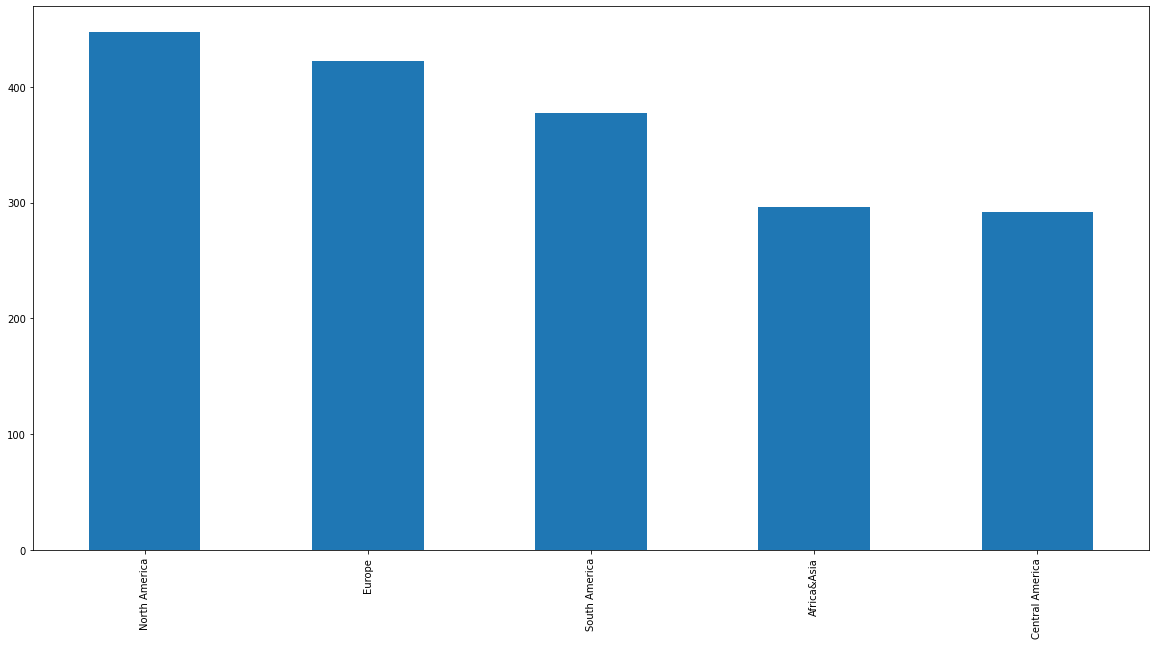

In [ ]:
data['Region'].value_counts().plot.bar()

Handeling Missing Values in Amount

In [ ]:
# filtering data, so taking the Amount with NaN values so we can Handle Missing Values
missing_rows_Amount = pd.isnull(data["Amount"])
data[missing_rows_Amount]

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,OrderDay,OrderMonth,OrderYear,InvoiceDay,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear
136,South America,2012-01-06,2012-02-14,2012-03-25,NaN,No,Paper,True,39,40,79,6,1,2012,14,2,2012,25,3,2012
368,Africa&Asia,2012-02-07,2012-04-19,2012-06-01,NaN,Yes,Paper,False,72,43,115,7,2,2012,19,4,2012,1,6,2012
456,North America,2012-04-27,2012-05-19,2012-07-01,NaN,No,Electronic,False,22,43,65,27,4,2012,19,5,2012,1,7,2012
916,South America,2012-07-28,2012-09-25,2012-11-07,NaN,No,Electronic,False,59,43,102,28,7,2012,25,9,2012,7,11,2012
951,North America,2012-07-27,2012-10-02,2012-11-14,NaN,No,Paper,False,67,43,110,27,7,2012,2,10,2012,14,11,2012
1447,North America,2012-12-29,2013-02-16,2013-03-31,NaN,No,Electronic,False,49,43,92,29,12,2012,16,2,2013,31,3,2013
1679,Europe,2013-02-23,2013-04-24,2013-06-06,NaN,No,Electronic,False,60,43,103,23,2,2013,24,4,2013,6,6,2013
1796,North America,2013-04-19,2013-05-25,2013-07-07,NaN,No,Paper,False,36,43,79,19,4,2013,25,5,2013,7,7,2013


In [ ]:
len(data[missing_rows_Amount])

8

In [ ]:
# Transforming the Data Frame into an array
array_of_MissingAmount_Values = data[missing_rows_Amount].to_numpy()
#print(array_of_MissingAmount_Values)

array_Region_MissingAmount_Values = []

# Taking Region valkues from rows that have missing values in Amount
for i in array_of_MissingAmount_Values:
      z = np.take(i,indices = 0)
      array_Region_MissingAmount_Values.append(z)
print(array_Region_MissingAmount_Values)
#print(len(data[bool_series]))

['South America', 'Africa&Asia', 'North America', 'South America', 'North America', 'North America', 'Europe', 'North America']


In [ ]:
#Filling the Missing values in Amount with the AVG of the Regions
missingAmount = []
for i in array_Region_MissingAmount_Values:
  if i == 'Central America':
    missingAmount.append(CAmerica_AVG_Value)
  elif i == 'South America':
    missingAmount.append(SouthAmerica_AVG_Value)
  elif i == 'Arica&Asia':
    missingAmount.append(AfricaAsia_AVG_Value)
  elif i == 'North America':
    missingAmount.append(NorthAmerica_AVG_Value)
  else:
    missingAmount.append(Europe_AVG_Value)

print(missingAmount)

[54.16, 70.06, 64.08, 54.16, 64.08, 64.08, 70.06, 64.08]


In [ ]:
# Fillint the missing values of Amount with the AGV in data
arrayofAmount = np.array(missingAmount)
data.loc[data['Amount'].isnull(), 'Amount'] = arrayofAmount

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 0 to 1849
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Region            1834 non-null   object        
 1   OrderDate         1834 non-null   datetime64[ns]
 2   InvoiceDate       1834 non-null   datetime64[ns]
 3   DueDate           1834 non-null   datetime64[ns]
 4   Amount            1834 non-null   float64       
 5   Disputed          1807 non-null   object        
 6   InvoiceType       1826 non-null   object        
 7   Delay             1834 non-null   bool          
 8   InvoiceOrderDiff  1834 non-null   int64         
 9   DueInvoiceDiff    1834 non-null   int64         
 10  DueOrderDiff      1834 non-null   int64         
 11  OrderDay          1834 non-null   int64         
 12  OrderMonth        1834 non-null   int64         
 13  OrderYear         1834 non-null   int64         
 14  InvoiceDay        1834 n

# Disputed and InvoiceType cleaning

Visualization for the Disputed feature with other feature to find out more information

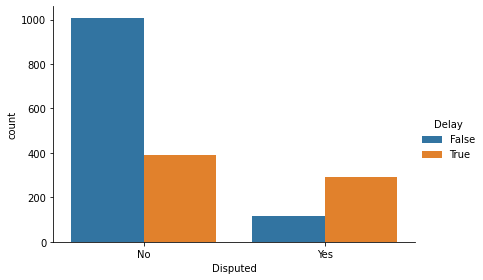

In [ ]:
# Create a catplot using the "Disputed" column as the x-axis and the "Delay" column as the hue
sns.catplot(x="Disputed", hue="Delay", data=data[['Disputed', 'Delay']], kind="count", height=4, aspect=1.5)

# Show the plot
plt.show()

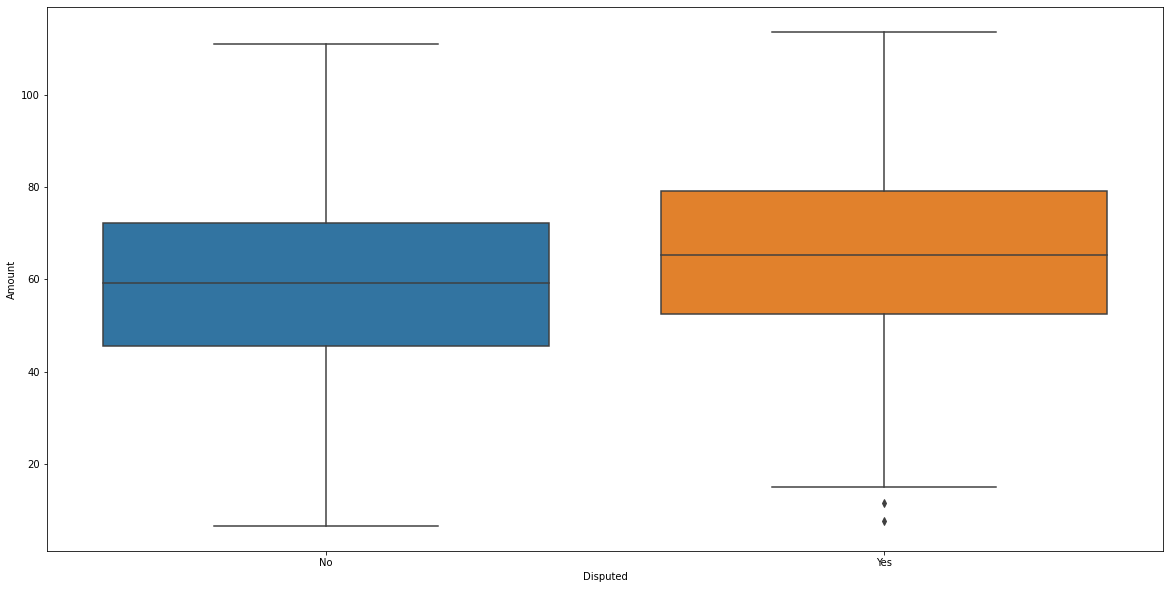

In [ ]:
# Create a boxplot for Disputed and Amount
sns.boxplot(x="Disputed", y="Amount", data=data[['Disputed', 'Amount']])

# Show the plot
plt.show()

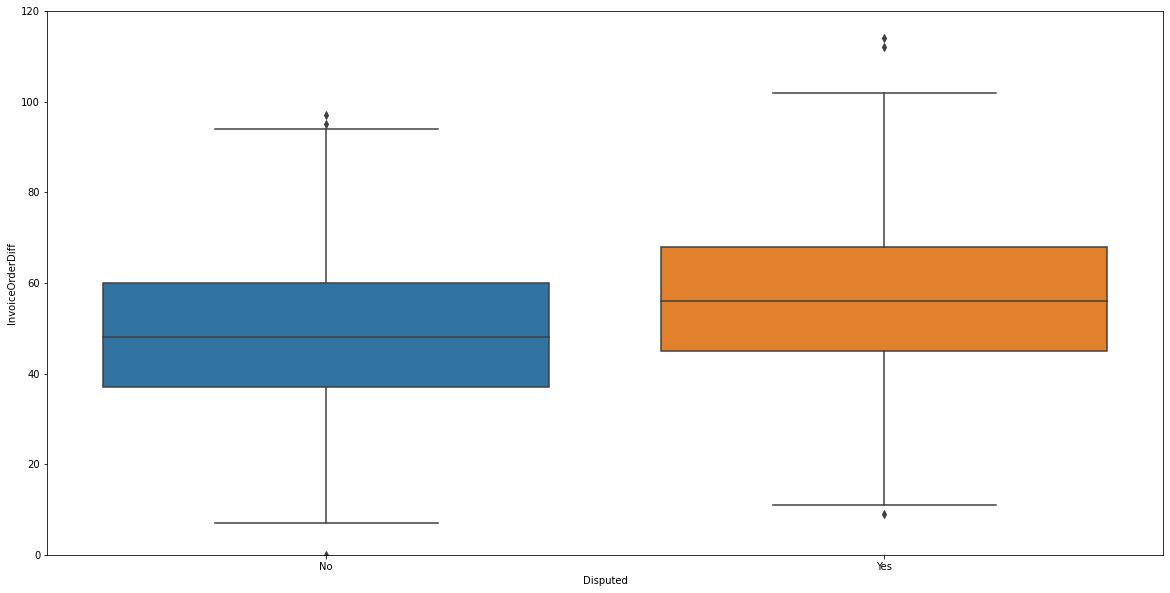

In [ ]:
# Create a boxplot for Disputed and InvoiceOrderDiff
sns.boxplot(x="Disputed", y="InvoiceOrderDiff", data=data[['Disputed', 'InvoiceOrderDiff']])

# Show the plot
plt.ylim(0,120)
plt.show()

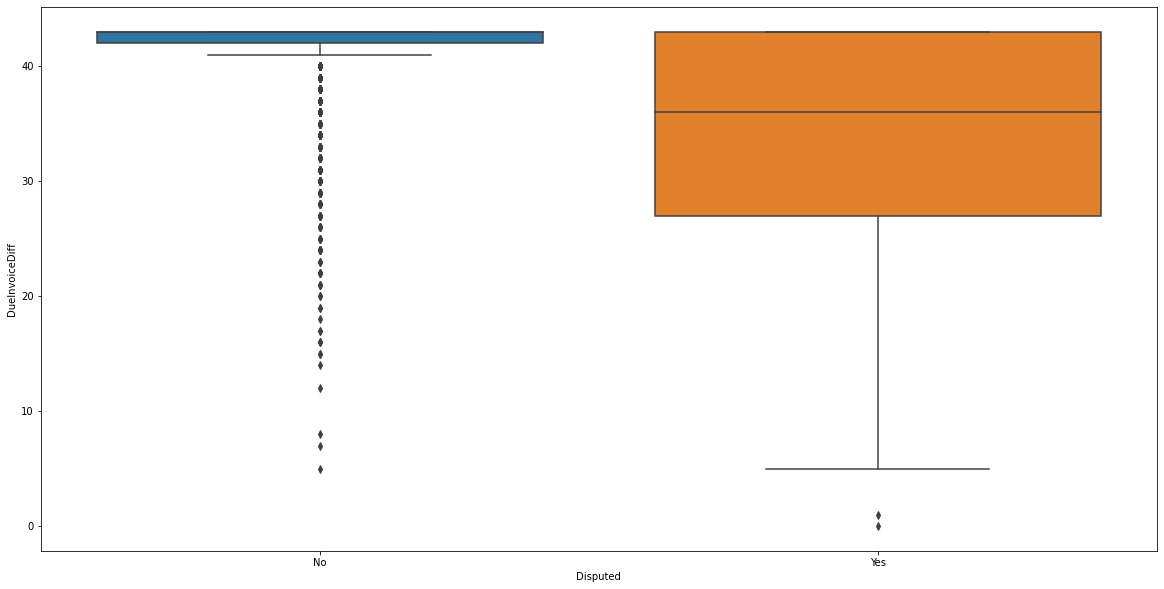

In [ ]:
# Create a boxplot for Disputed and DueInvoiceDiff
sns.boxplot(x="Disputed", y="DueInvoiceDiff", data=data[['Disputed', 'DueInvoiceDiff']])

# Show the plot
plt.show()

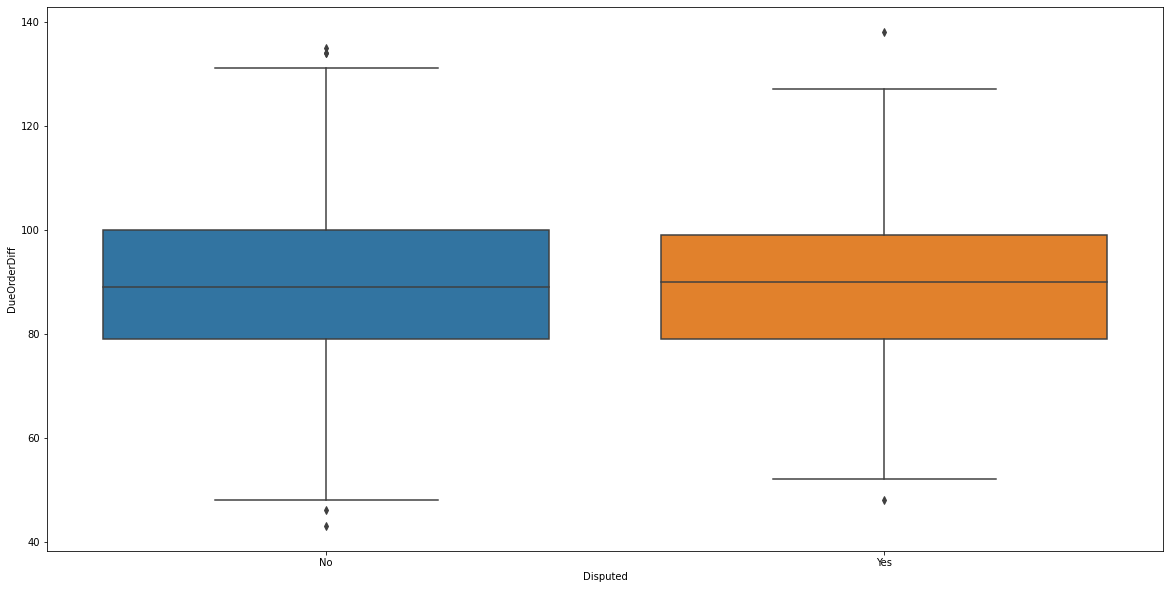

In [ ]:
# Create a boxplot for Disputed and DueOrderDiff
sns.boxplot(x="Disputed", y="DueOrderDiff", data=data[['Disputed', 'DueOrderDiff']])

# Show the plot
plt.show()

Disputed          No  Yes
Region                   
Africa&Asia      182  111
Central America  248   41
Europe           260  156
North America    403   39
South America    306   61


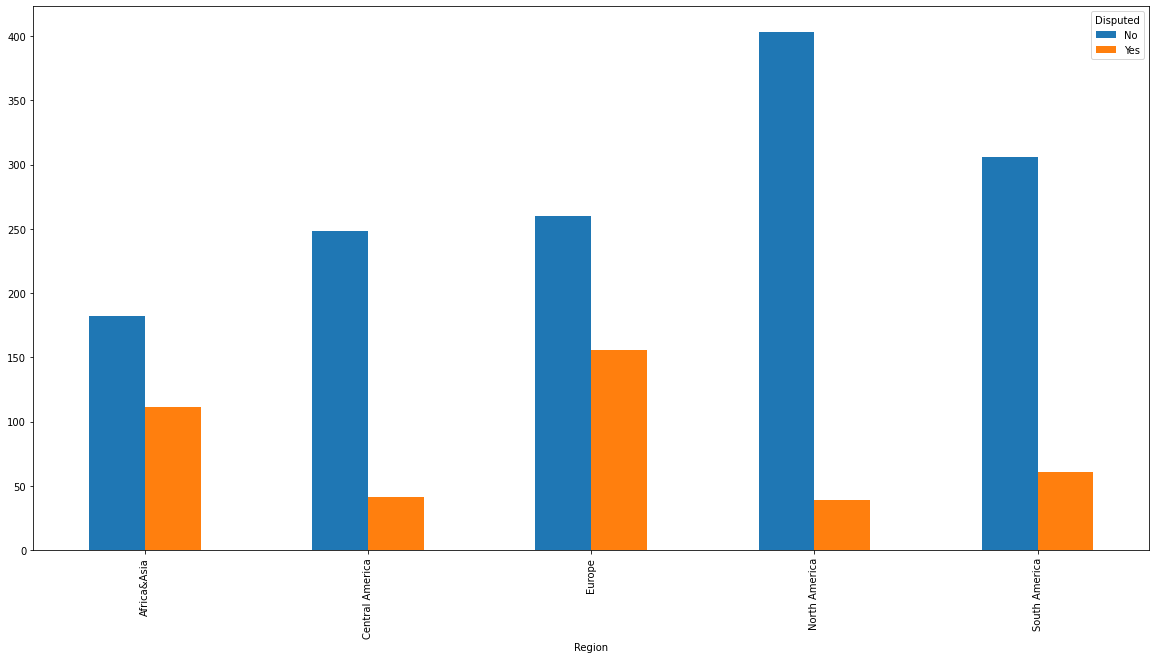

In [ ]:
#Visualization for the Disputed feature in every region
CrosstabResult=pd.crosstab(index=data['Region'],columns=data['Disputed'])
print(CrosstabResult)
CrosstabResult.plot.bar()

As a conclusion after visualization, Disputed is correlated with the delay and regions

Replacing Disputed NaN values with the corresponding value of the Delay column

In [ ]:
missing = pd.isnull(data['Disputed'])

In [ ]:
#Convert delay and disputed in 0 and 1
data['Disputed'] = data['Disputed'].replace({'Yes': 1, 'No': 0})
data['Delay'] = data['Delay'].replace({True: 1, False: 0}).astype(float)

In [ ]:
#fill the Disputed missing values
data['Disputed'] = data['Disputed'].fillna(data['Delay'])

In [ ]:
#check if the values are filled
data['Disputed'].isnull().sum()

0

Convert from float to integer

In [ ]:
data['Disputed'] = data['Disputed'].astype(int)
data['Delay'] = data['Delay'].astype(int)

InvoiceType feature filling missing values

Visualization

InvoiceType      Electronic  Paper
Region                            
Africa&Asia              88    205
Central America          81    211
Europe                  188    232
North America           149    296
South America           147    229


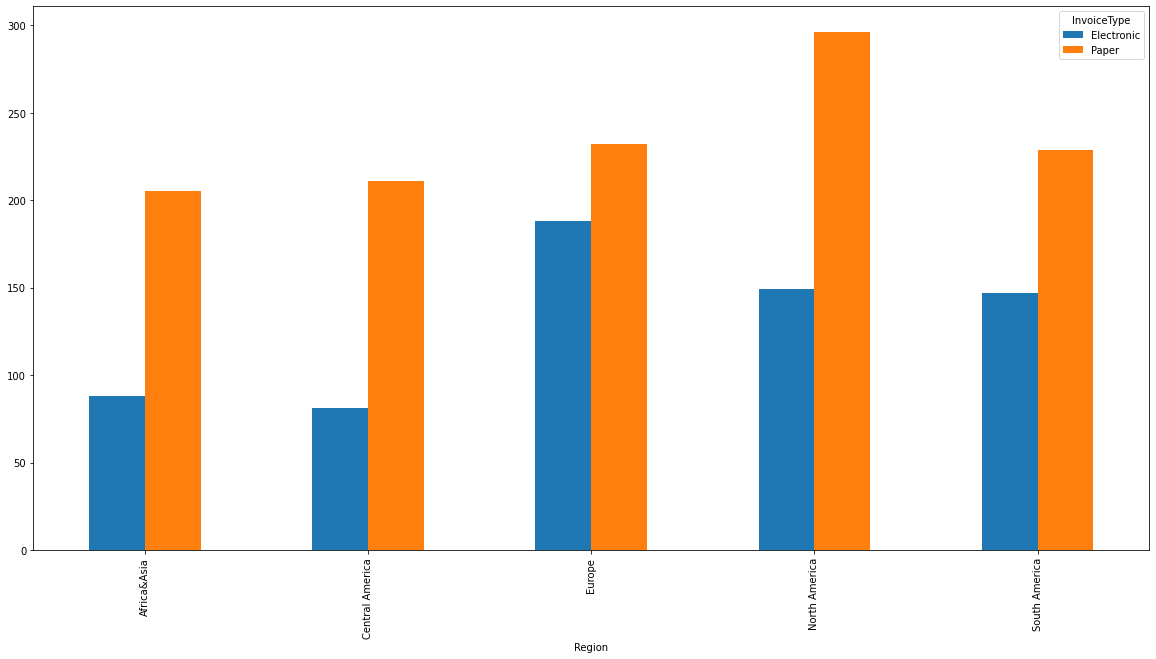

In [ ]:
#Visualization for the InvoiceType feature in every region
CrosstabResult=pd.crosstab(index=data['Region'],columns=data['InvoiceType'])
print(CrosstabResult)
CrosstabResult.plot.bar()

Find the mode(most frequent value) for each region and fill the missing value with each mode

Display missing InvoiceType values

In [ ]:
missing1 = pd.isnull(data['InvoiceType'])
data[missing1]

,Region,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,OrderDay,OrderMonth,OrderYear,InvoiceDay,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear
184,Africa&Asia,2012-01-20,2012-02-29,2012-04-12,68.31,0,NaN,0,40,43,83,20,1,2012,29,2,2012,12,4,2012
589,North America,2012-05-07,2012-06-22,2012-08-04,49.08,0,NaN,0,46,43,89,7,5,2012,22,6,2012,4,8,2012
756,North America,2012-06-19,2012-08-12,2012-09-24,49.75,0,NaN,0,54,43,97,19,6,2012,12,8,2012,24,9,2012
900,Africa&Asia,2012-07-12,2012-09-21,2012-10-25,73.69,1,NaN,1,71,34,105,12,7,2012,21,9,2012,25,10,2012
1007,Africa&Asia,2012-09-30,2012-10-21,2012-12-03,41.84,0,NaN,0,21,43,64,30,9,2012,21,10,2012,3,12,2012
1470,Europe,2013-01-25,2013-02-23,2013-04-04,59.31,1,NaN,1,29,40,69,25,1,2013,23,2,2013,4,4,2013
1649,South America,2013-03-04,2013-04-16,2013-05-19,61.14,1,NaN,1,43,33,76,4,3,2013,16,4,2013,19,5,2013
1838,Europe,2013-05-15,2013-06-02,2013-07-15,86.87,0,NaN,0,18,43,61,15,5,2013,2,6,2013,15,7,2013


Drop all the missing values to find the mode

In [ ]:
data_noMissingInvoice=data.dropna(axis=0, subset=['InvoiceType'])
data_noMissingInvoice['InvoiceType'].isnull().sum()

0

In [ ]:
#Group by Region
grouped1 = data_noMissingInvoice.groupby('Region')

# Calculate the mode of the 'InvoiceType' column for each group
modes1 = grouped1['InvoiceType'].apply(lambda x: x.mode())
modes1

Region            
Africa&Asia      0    Paper
Central America  0    Paper
Europe           0    Paper
North America    0    Paper
South America    0    Paper
Name: InvoiceType, dtype: object

In [ ]:
#sorted regions vector use for the next part
regions=data['Region'].unique()
regions=sorted(regions)
regions

['Africa&Asia', 'Central America', 'Europe', 'North America', 'South America']

Fill the missing values

In [ ]:
#fill each missing InvoiceType from each region with the corresponding mode
for i in range (0,len(regions)):
  data.loc[data['Region'] == regions[i], 'InvoiceType'] = data['InvoiceType'].fillna(modes1[i])

In [ ]:
#convert categorical InvoiceType into numerical
data['InvoiceType'] = data['InvoiceType'].replace({'Paper': 1, 'Electronic': 0}).astype(int)

In [ ]:
#check if there are still different rows in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 0 to 1849
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Region            1834 non-null   object        
 1   OrderDate         1834 non-null   datetime64[ns]
 2   InvoiceDate       1834 non-null   datetime64[ns]
 3   DueDate           1834 non-null   datetime64[ns]
 4   Amount            1834 non-null   float64       
 5   Disputed          1834 non-null   int64         
 6   InvoiceType       1834 non-null   int64         
 7   Delay             1834 non-null   int64         
 8   InvoiceOrderDiff  1834 non-null   int64         
 9   DueInvoiceDiff    1834 non-null   int64         
 10  DueOrderDiff      1834 non-null   int64         
 11  OrderDay          1834 non-null   int64         
 12  OrderMonth        1834 non-null   int64         
 13  OrderYear         1834 non-null   int64         
 14  InvoiceDay        1834 n

#Region One hot encoding

In [ ]:
#transforming into One Hot Encoding the Region coulmn since we have categorical values
encoded_columns = pd.get_dummies(data.Region)
data = data.join(encoded_columns).drop('Region',axis = 1)

In [ ]:
data

,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,...,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear,Africa&Asia,Central America,Europe,North America,South America
0,2011-11-06,2012-01-03,2012-02-06,55.37,0,1,1,58,34,92,...,1,2012,6,2,2012,0,0,0,1,0
1,2011-11-17,2012-01-03,2012-02-15,50.39,0,1,0,47,43,90,...,1,2012,15,2,2012,0,0,0,0,1
2,2011-11-28,2012-01-03,2012-02-15,71.33,0,1,0,36,43,79,...,1,2012,15,2,2012,0,0,1,0,0
3,2011-11-01,2012-01-03,2012-01-22,97.60,0,1,1,63,19,82,...,1,2012,22,1,2012,1,0,0,0,0
4,2011-11-08,2012-01-03,2012-02-15,15.99,1,1,1,56,43,99,...,1,2012,15,2,2012,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,2013-03-22,2013-06-05,2013-06-29,103.11,1,0,1,75,24,99,...,6,2013,29,6,2013,0,0,1,0,0
1846,2013-04-04,2013-06-05,2013-06-22,43.07,1,0,1,62,17,79,...,6,2013,22,6,2013,0,1,0,0,0
1847,2013-05-25,2013-06-05,2013-07-18,57.04,0,0,0,11,43,54,...,6,2013,18,7,2013,0,0,0,1,0
1848,2013-04-13,2013-06-05,2013-07-18,57.33,0,0,0,53,43,96,...,6,2013,18,7,2013,0,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834 entries, 0 to 1849
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderDate         1834 non-null   datetime64[ns]
 1   InvoiceDate       1834 non-null   datetime64[ns]
 2   DueDate           1834 non-null   datetime64[ns]
 3   Amount            1834 non-null   float64       
 4   Disputed          1834 non-null   int64         
 5   InvoiceType       1834 non-null   int64         
 6   Delay             1834 non-null   int64         
 7   InvoiceOrderDiff  1834 non-null   int64         
 8   DueInvoiceDiff    1834 non-null   int64         
 9   DueOrderDiff      1834 non-null   int64         
 10  OrderDay          1834 non-null   int64         
 11  OrderMonth        1834 non-null   int64         
 12  OrderYear         1834 non-null   int64         
 13  InvoiceDay        1834 non-null   int64         
 14  InvoiceMonth      1834 n

In [ ]:
data['Delay'].value_counts()

0    1139
1     695
Name: Delay, dtype: int64

In [ ]:
data['Delay'].head(10)

0    1
1    0
2    0
3    1
4    1
5    0
6    0
7    1
8    1
9    0
Name: Delay, dtype: int64

In [ ]:
#transforming the Delay column in 0 , 1 sice its a categorical value and we only have true and False
data['Delay'] = (data['Delay'] == True).astype(int)

In [ ]:
data

,OrderDate,InvoiceDate,DueDate,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,...,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear,Africa&Asia,Central America,Europe,North America,South America
0,2011-11-06,2012-01-03,2012-02-06,55.37,0,1,1,58,34,92,...,1,2012,6,2,2012,0,0,0,1,0
1,2011-11-17,2012-01-03,2012-02-15,50.39,0,1,0,47,43,90,...,1,2012,15,2,2012,0,0,0,0,1
2,2011-11-28,2012-01-03,2012-02-15,71.33,0,1,0,36,43,79,...,1,2012,15,2,2012,0,0,1,0,0
3,2011-11-01,2012-01-03,2012-01-22,97.60,0,1,1,63,19,82,...,1,2012,22,1,2012,1,0,0,0,0
4,2011-11-08,2012-01-03,2012-02-15,15.99,1,1,1,56,43,99,...,1,2012,15,2,2012,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,2013-03-22,2013-06-05,2013-06-29,103.11,1,0,1,75,24,99,...,6,2013,29,6,2013,0,0,1,0,0
1846,2013-04-04,2013-06-05,2013-06-22,43.07,1,0,1,62,17,79,...,6,2013,22,6,2013,0,1,0,0,0
1847,2013-05-25,2013-06-05,2013-07-18,57.04,0,0,0,11,43,54,...,6,2013,18,7,2013,0,0,0,1,0
1848,2013-04-13,2013-06-05,2013-07-18,57.33,0,0,0,53,43,96,...,6,2013,18,7,2013,0,0,0,1,0


In [ ]:
#droping the OrderDate , InvoiceDate , DueDate since we finished working with them and they are not useful anymore for the ML algorythem
data.drop(['OrderDate','InvoiceDate','DueDate'], axis=1, inplace=True)

In [ ]:
data

,Amount,Disputed,InvoiceType,Delay,InvoiceOrderDiff,DueInvoiceDiff,DueOrderDiff,OrderDay,OrderMonth,OrderYear,...,InvoiceMonth,InvoiceYear,DueDay,DueMonth,DueYear,Africa&Asia,Central America,Europe,North America,South America
0,55.37,0,1,1,58,34,92,6,11,2011,...,1,2012,6,2,2012,0,0,0,1,0
1,50.39,0,1,0,47,43,90,17,11,2011,...,1,2012,15,2,2012,0,0,0,0,1
2,71.33,0,1,0,36,43,79,28,11,2011,...,1,2012,15,2,2012,0,0,1,0,0
3,97.60,0,1,1,63,19,82,1,11,2011,...,1,2012,22,1,2012,1,0,0,0,0
4,15.99,1,1,1,56,43,99,8,11,2011,...,1,2012,15,2,2012,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,103.11,1,0,1,75,24,99,22,3,2013,...,6,2013,29,6,2013,0,0,1,0,0
1846,43.07,1,0,1,62,17,79,4,4,2013,...,6,2013,22,6,2013,0,1,0,0,0
1847,57.04,0,0,0,11,43,54,25,5,2013,...,6,2013,18,7,2013,0,0,0,1,0
1848,57.33,0,0,0,53,43,96,13,4,2013,...,6,2013,18,7,2013,0,0,0,1,0


# **ML Part**

Libraries needed in this part

In [ ]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
plt.rcParams['figure.figsize'] = 20, 10

In [ ]:
#Set the target column and split into test and train
X = data.drop('Delay', axis=1)
y = data['Delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#StandardScaler removes the mean and scales each feature to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Spot Check Algorithms to see the differences between them
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.943421 (0.025180)
LDA: 0.856868 (0.022865)
KNN: 0.793458 (0.030296)
CART: 0.950256 (0.024134)
NB: 0.920226 (0.027841)
SVM: 0.910703 (0.021643)


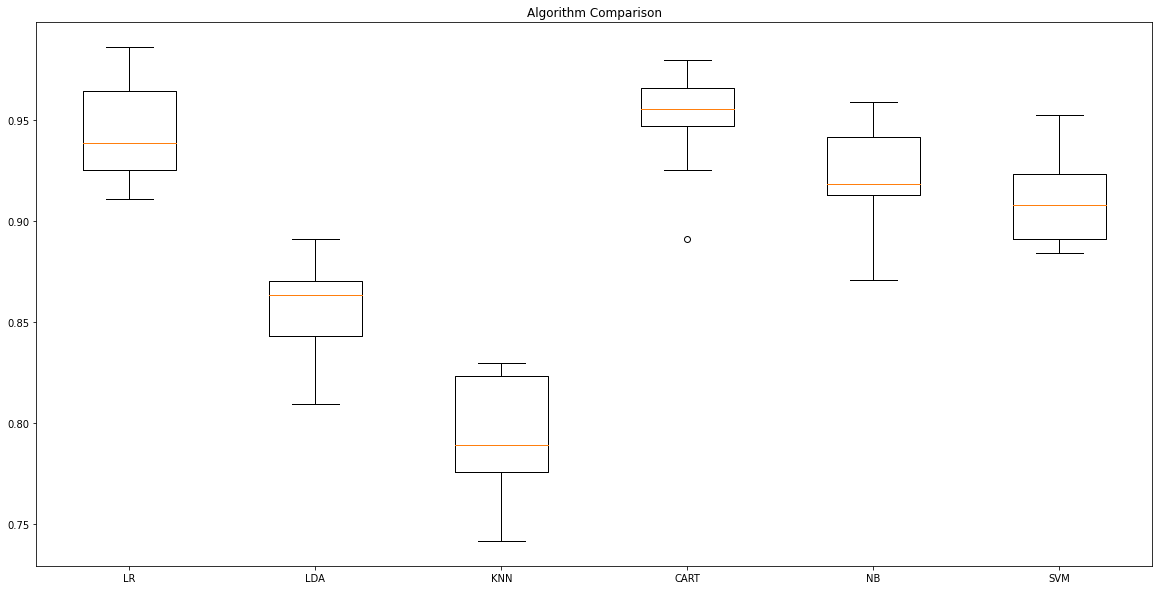

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

Predictions

In [ ]:
# Make predictions for a Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9482288828337875
[[239  13]
 [  6 109]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       252
           1       0.89      0.95      0.92       115

    accuracy                           0.95       367
   macro avg       0.93      0.95      0.94       367
weighted avg       0.95      0.95      0.95       367



In [ ]:
#display the confussion matrix
conf_matrx = confusion_matrix(y_test, predictions)
conf_matrx

array([[239,  13],
       [  6, 109]])

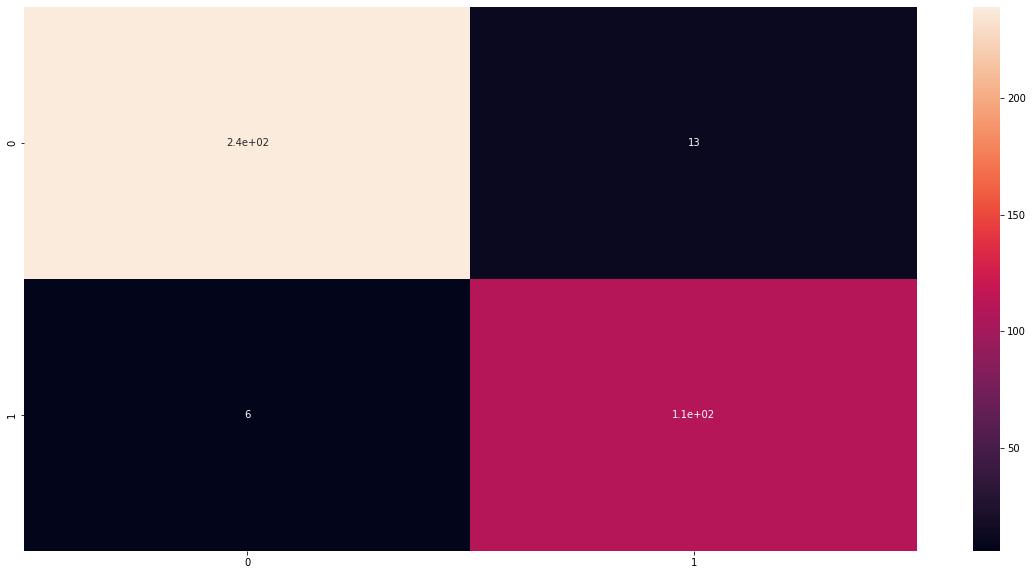

In [ ]:
#visualize the confusion matrix
import seaborn as sns

sns.heatmap(conf_matrx,annot = True)
plt.show()

# Random Forest Hyperparameter Tuning

In [ ]:
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 20, num = 10)]
#number of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum number of leaves in the tree
max_depth = [5, 10]
#minimum number of samples required to split a node
min_samples_split = [2,3,4]
#minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
#Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
#Create the parameter grid
param_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}
print(param_grid)

{'n_estimators': [5, 6, 8, 10, 11, 13, 15, 16, 18, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
#train the model without parameters
rf_Model = RandomForestClassifier()

RandomizedSearchCSV

In [ ]:
#search through the parameter grid randomly; it is faster than grid searching
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions= param_grid, cv = 10, verbose = 2, n_jobs = 4)

In [ ]:
#train the model using hyperparameter tuning
rf_model=rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#best paramters
rf_RandomGrid.best_params_

{'n_estimators': 18,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': False}

Accuracy

In [ ]:
print('Train Accuracy : ', rf_RandomGrid.score(X_train, y_train))
print('Test Accuracy : ', rf_RandomGrid.score(X_test, y_test))

Train Accuracy :  0.9809134287661895
Test Accuracy :  0.9836512261580381


In [ ]:
#predictions
predictions_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate predictions with F1-score
print(accuracy_score(y_test, predictions_rf))
print(confusion_matrix(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

0.9836512261580381
[[252   0]
 [  6 109]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       252
           1       1.00      0.95      0.97       115

    accuracy                           0.98       367
   macro avg       0.99      0.97      0.98       367
weighted avg       0.98      0.98      0.98       367



# SVM Hyperparameter Tuning

In [ ]:
# Create the parameter grid
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

GridSearchCSV

In [ ]:
# Using GridSearch as an alternate method for this model
svm_grid = GridSearchCV(SVC(), param_grid_svm, refit = True, verbose = 3)

In [ ]:
# Train the model using hyperparameter tuning
svm_model = svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.605 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.604 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.604 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.604 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.788 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.789 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
# Best parameters
svm_grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
predictions_SVC = svm_model.predict(X_test)

In [ ]:
# Evaluate predictions
print(accuracy_score(y_test, predictions_SVC))
print(confusion_matrix(y_test, predictions_SVC))
print(classification_report(y_test, predictions_SVC))

0.9673024523160763
[[252   0]
 [ 12 103]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       252
           1       1.00      0.90      0.94       115

    accuracy                           0.97       367
   macro avg       0.98      0.95      0.96       367
weighted avg       0.97      0.97      0.97       367



Accuracy

In [ ]:
# Obtained Accuracy
print('Train Accuracy : ', svm_grid.score(X_train, y_train))
print('Test Accuracy : ', svm_grid.score(X_test, y_test))

Train Accuracy :  0.9686434901158828
Test Accuracy :  0.9673024523160763


# CONCLUSION

After going through the entire preprocessing part, we created a list of models to better understand which model would suit us best for predicting the Delay feature.

We arrived to the conclusion that the most suitable models were Random Forest, as most of the values were categorical (0 and 1), and Support Vector Machine, as we had a big number of features and a small number of samples.